<a href="https://colab.research.google.com/github/Awanieva/Team-InsightHub/blob/main/Cereal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis on 80 Cereal Products by Insight Hub Team**

# **importing Libraries**

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing Data**

In [518]:
cereal=pd.read_csv("cereal.csv")

# **Understanding Data set**

In [519]:
cereal.shape

(77, 16)

In [520]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [521]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [522]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


# **Basic Data Visualization**

In [523]:
# Let's explore the distribution of each of the variables particularly the numerical variables
# For reusability, let's define a function for the distribution plot

def distribution_plot(variable_name, a,b, df = cereal):
  sns.set(style="darkgrid")
  sns.histplot(data=df, x= variable_name, kde= True, bins = 10, ax = axs[a,b])
  # plt.title(f'Distribution of {variable_name}')
  plt.xlabel(variable_name)

<bound method Figure.tight_layout of <Figure size 1600x1200 with 12 Axes>>

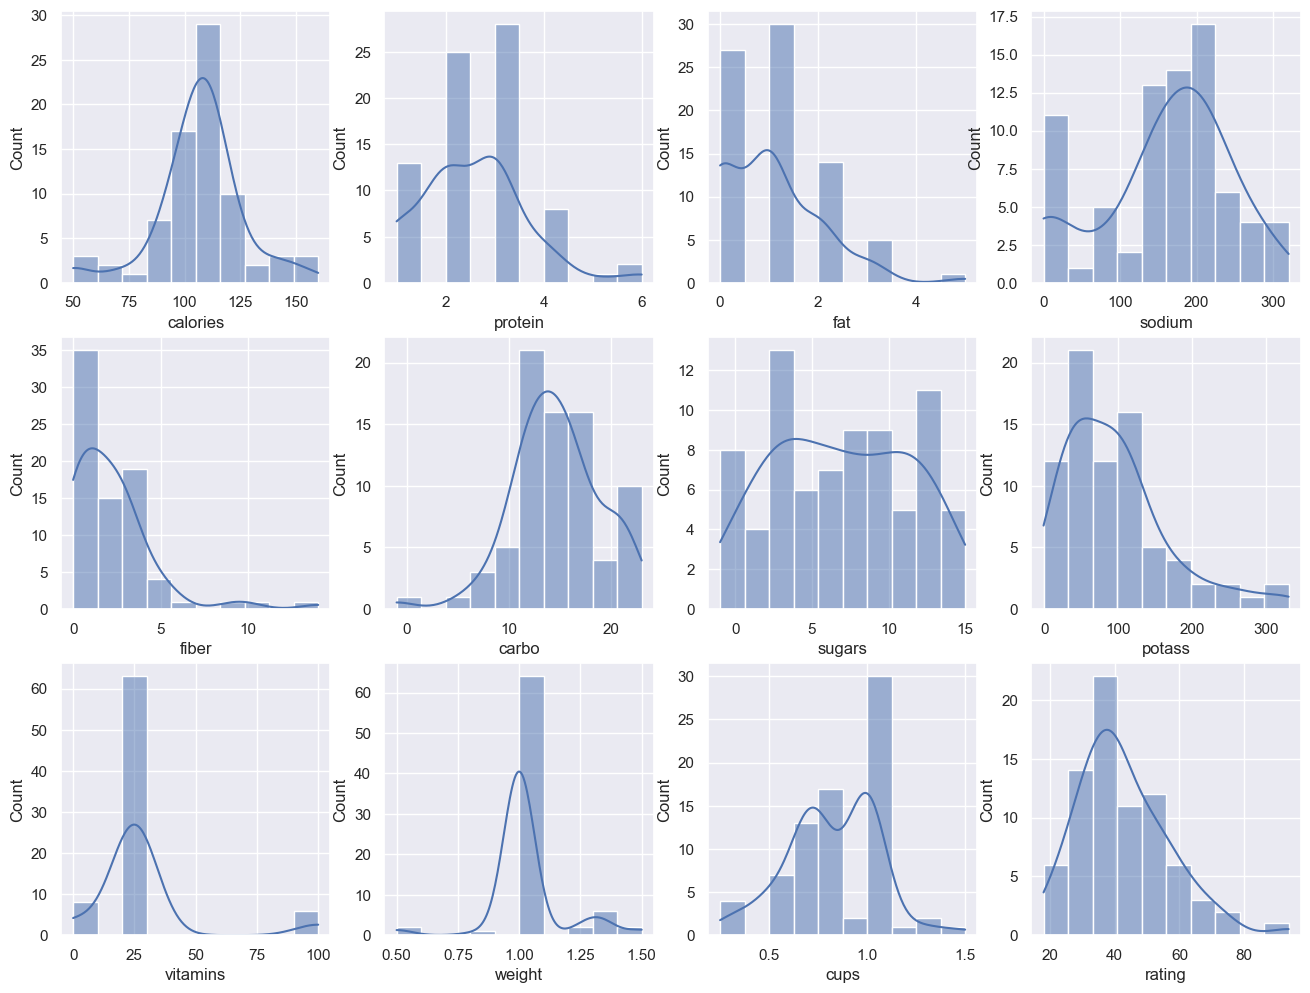

In [524]:
fig,axs = plt.subplots(3,4, figsize = (16, 12))
distribution_plot("calories", 0, 0)
distribution_plot("protein", 0, 1)
distribution_plot("fat", 0, 2)
distribution_plot("sodium", 0, 3)
distribution_plot("fiber", 1, 0)
distribution_plot("carbo", 1, 1)
distribution_plot("sugars", 1, 2)
distribution_plot("potass", 1, 3)
distribution_plot("vitamins", 2, 0)
distribution_plot("weight", 2, 1)
distribution_plot("cups", 2, 2)
distribution_plot("rating", 2, 3)
fig.tight_layout

From the Above Visualization, below are some brief details of nutrients based on numerical value frequency
1. calories: more than 30 of the products are ranging from 100-120 calories
2. protein: over 50 products have a protein content ranging from 2-3
3. fat: over 55 products have a fat content ranging from 0-2
4. sodium: more than 44 products have a sodium content ranging from 150-200
5. fiber: about 35 products have a fiber content from 0-2
6. carbo: More than 50 products contain carbohydrate of 12-18
7. sugars: more than 15 products have a suagr content of 2-3 and about 12 products having a sugar content of 12-13
8. potass: more than 48 of the products have a potass content of 0-100 range
9: vitamins: about 50 products have a vitamin content of 20-30



<Axes: >

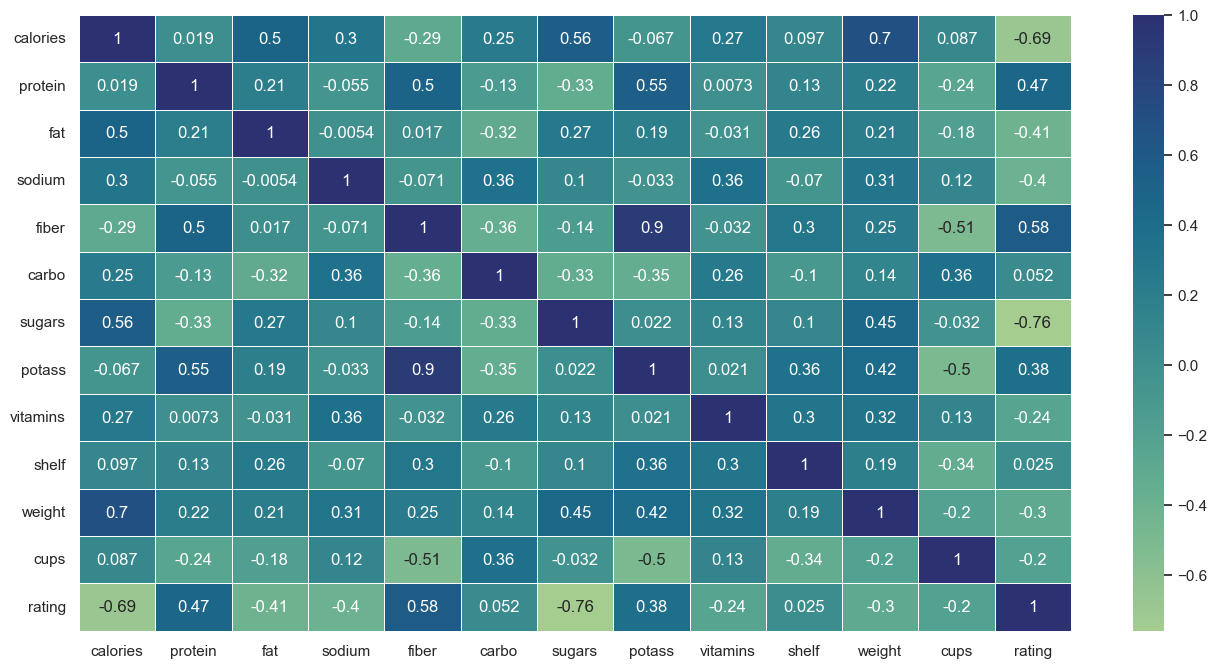

In [525]:
cereal_corr = cereal.drop(['name', 'mfr', 'type'], axis = 1)
corr_matrix = cereal_corr.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap="crest")

From the above Correlation of colunms, below are some observation
1. The highest correlation seen is 0.9 which is between fiber and Potass
2. other correlation ranging from 0.5-0.7 are seen in calories and weight, rating and fiber, carbo and rating, calories and fat, calories and sugar, protein and fiber and protein and potass.

<Axes: >

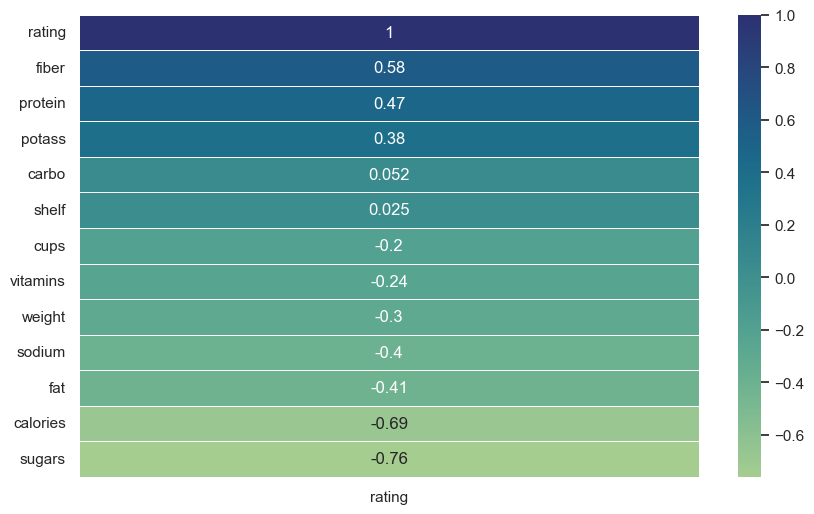

In [526]:
#checking the columns that Corr more with the Rating Column
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['rating']].sort_values(by='rating', ascending=False), annot=True, linewidth=.5, cmap="crest")

from the above visualization it is found out that
1. Fiber has the highest corr. with rating
2. suagrs has the Lowest corr. with rating

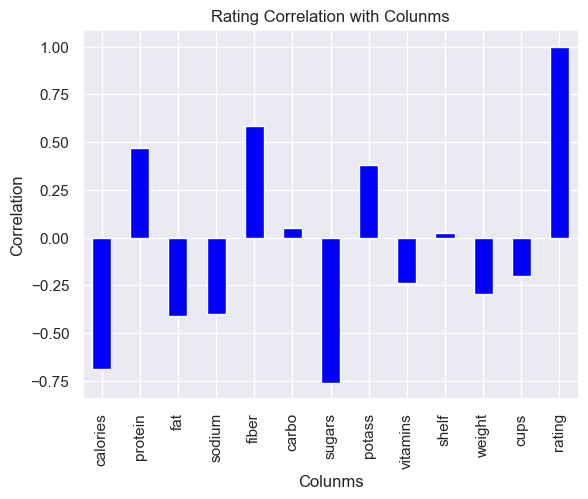

In [527]:
cerealcorr_rating=cereal_corr.corrwith(cereal_corr['rating'])
cerealcorr_rating.plot(kind='bar', color = 'blue')
plt.title('Rating Correlation with Colunms')
plt.xlabel('Colunms')
plt.ylabel('Correlation')
plt.show()


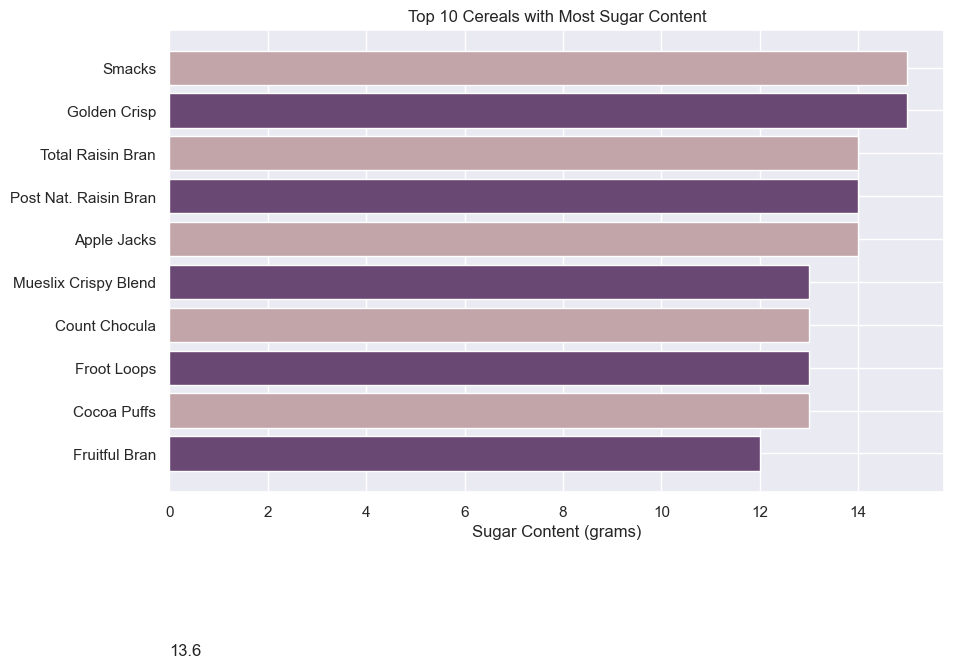

In [528]:
sugar_highest = cereal[['name', 'sugars']].sort_values(by='sugars', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(sugar_highest['name'], sugar_highest['sugars'], color=['#C1A5A9', '#694873'])
plt.text(0, sugar_highest['sugars'].mean(), round(sugar_highest['sugars'].mean(), 1), va='center')
plt.title("Top 10 Cereals with Most Sugar Content")
plt.xlabel("Sugar Content (grams)")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.show()

From the above Visualization, it was observed that
1. smacks and golden crisp are having the highest sugar content
2. And 3 more products (Total Raisin Bran, Post Nat. Raisin Bran, and Apple Jacks) had higher sugar content  

In [529]:
#cereals with the Lowest Sugar Content
w_o_sugar = cereal.loc[cereal['sugars'] == 0, ['name']]
print(w_o_sugar['name'])

3     All-Bran with Extra Fiber
20       Cream of Wheat (Quick)
54                  Puffed Rice
55                 Puffed Wheat
63               Shredded Wheat
64       Shredded Wheat 'n'Bran
65    Shredded Wheat spoon size
Name: name, dtype: object


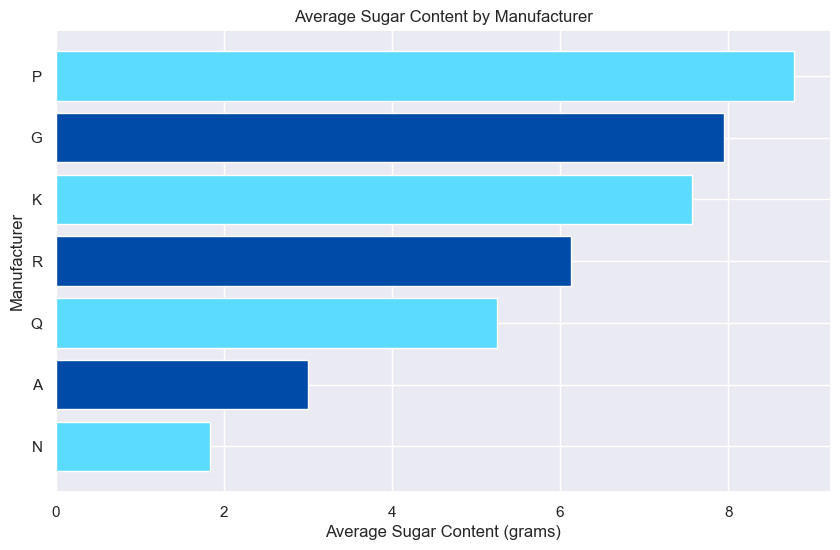

In [530]:
#Creating a Barh for average sugar content based on Manufacturer
mfr_sugar = cereal.groupby('mfr')['sugars'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(mfr_sugar.index, mfr_sugar, color=['#5ADBFF', '#004BA8'])
plt.title("Average Sugar Content by Manufacturer")
plt.xlabel("Average Sugar Content (grams)")
plt.ylabel("Manufacturer")
plt.show()

from the Above Visualization, it is Observed that
1. P(Post) manufacturer cereal products has the Highest Sugar content when compared the other Products
2. N(Nabisco) manufacturer cereal products has the lowest Sugar content when compared to other products

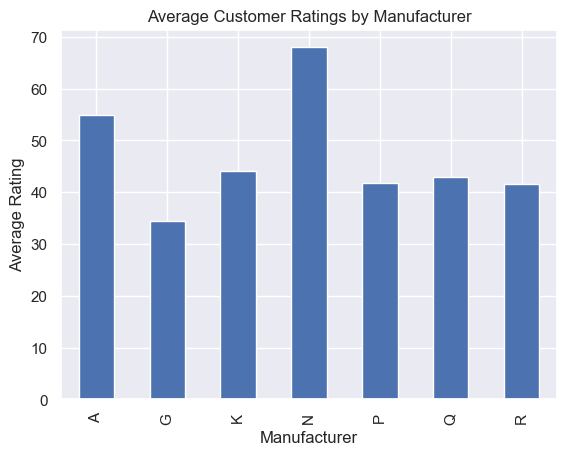

In [531]:
avg_ratings = cereal.groupby('mfr')['rating'].mean()
avg_ratings.plot(kind='bar')
plt.title('Average Customer Ratings by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.show()


From th above Visualization, the following was Observed
1. N and A (Nabisco and American Home Food Products) have the highest customer rating
2. G (General Mills) has the lowest customer rating

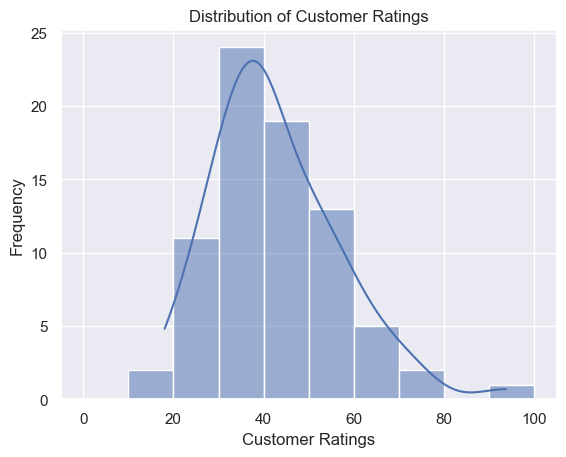

In [532]:
#Creating a Hist of the Frequency of Customer Raings
_ = sns.histplot(data=cereal, x='rating', bins=10, binrange=(0,100), kde=True)\
    .set(title='Distribution of Customer Ratings')
plt.xlabel('Customer Ratings')
plt.ylabel('Frequency')
plt.show()

#**Creating New Columns**

In [533]:
cereal['brand'] = None

cereal['ingredient_sum'] = None

In [534]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'brand', 'ingredient_sum'],
      dtype='object')

#**Creating a Mapping**

In [535]:
manufacturer_mapping={'A':'American Home Food Products', 'G':'General Mills', 'K':'Kelloggs','N':'Nabisco','P':'Post','Q':'Quaker Oats','R':'Ralston Purina'}

In [536]:
cereal['brand'] = cereal['mfr'].map(manufacturer_mapping)

In [537]:
print(cereal['brand'])

0            Nabisco
1        Quaker Oats
2           Kelloggs
3           Kelloggs
4     Ralston Purina
           ...      
72     General Mills
73     General Mills
74    Ralston Purina
75     General Mills
76     General Mills
Name: brand, Length: 77, dtype: object


In [538]:
cereal.brand

0            Nabisco
1        Quaker Oats
2           Kelloggs
3           Kelloggs
4     Ralston Purina
           ...      
72     General Mills
73     General Mills
74    Ralston Purina
75     General Mills
76     General Mills
Name: brand, Length: 77, dtype: object

#**Creating an Ingredient Category**

In [539]:
ingredient_columns=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']
cereal['ingredient_sum'] = cereal[ingredient_columns].sum(axis=1)
insights=cereal[['name','brand','ingredient_sum']]

In [540]:
insights

,name,brand,ingredient_sum
0,100% Bran,Nabisco,531.0
1,100% Natural Bran,Quaker Oats,296.0
2,All-Bran,Kelloggs,701.0
3,All-Bran with Extra Fiber,Kelloggs,571.0
4,Almond Delight,Ralston Purina,361.0
...,...,...,...
72,Triples,General Mills,472.0
73,Trix,General Mills,327.0
74,Wheat Chex,Ralston Purina,497.0
75,Wheaties,General Mills,462.0


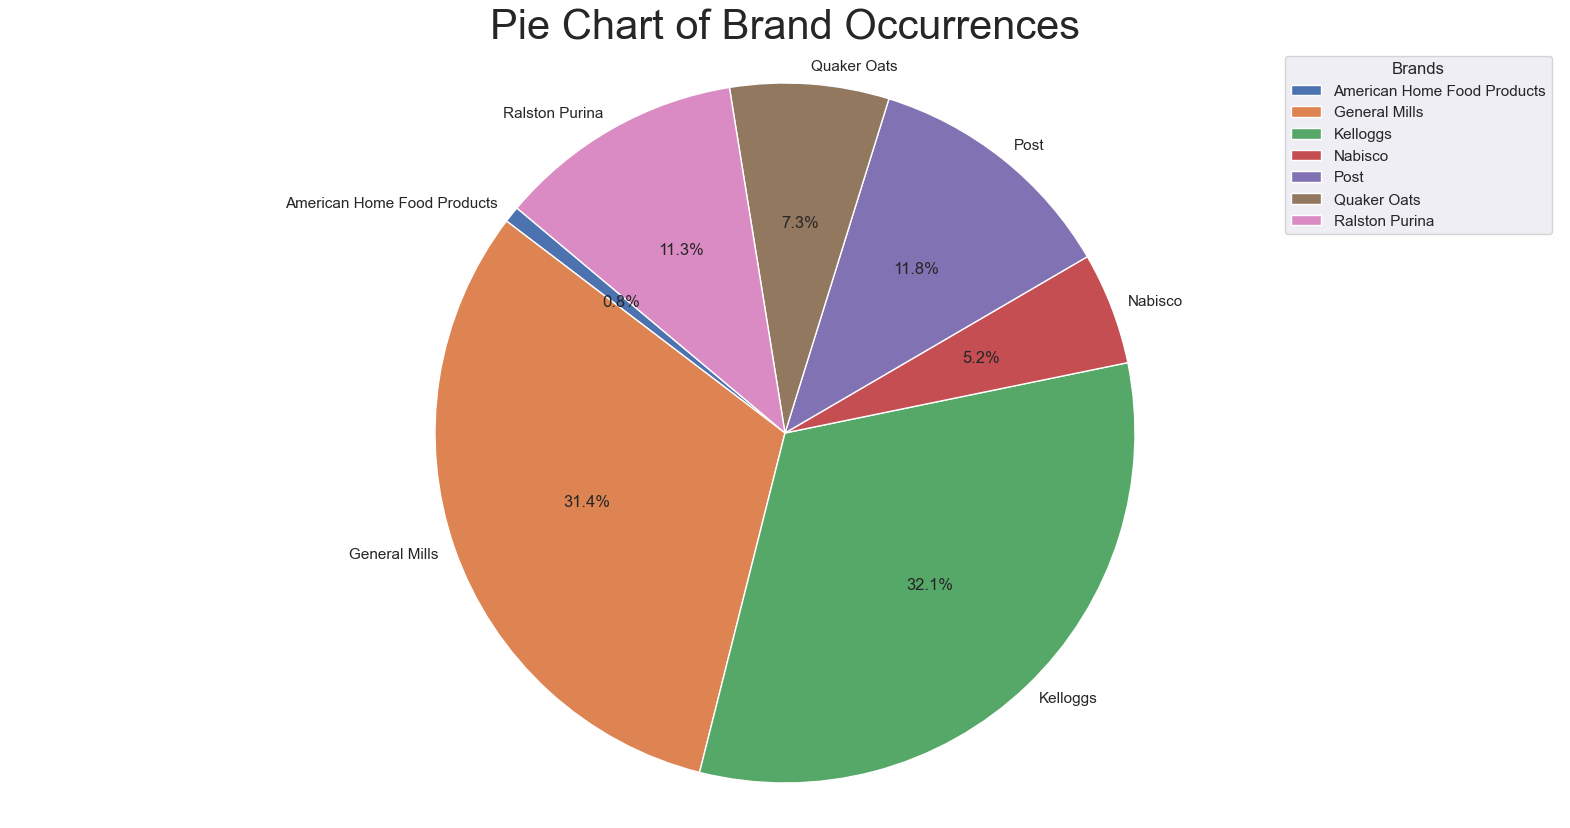

In [541]:
#Grouping the data by 'brand' and calculating the total ingredient_sum of each category
brand_counts = cereal.groupby('brand')['ingredient_sum'].sum()

# Creating a pie chart
plt.figure(figsize=(20, 10))
wedges, texts, autotexts = plt.pie(brand_counts, labels=brand_counts.index, labeldistance=1.05, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Pie Chart of Brand Occurrences', fontsize=30)


# Displaying the pie chart
plt.axis('equal')
plt.legend(brand_counts.index, title='Brands', loc='upper right')
plt.show()

In [542]:
print(brand_counts)

brand
American Home Food Products      244.0
General Mills                  10118.0
Kelloggs                       10350.0
Nabisco                         1668.0
Post                            3798.0
Quaker Oats                     2362.7
Ralston Purina                  3654.0
Name: ingredient_sum, dtype: float64


From the Above Visualization it is oberved that
1. kellogs and General Mills has the highest number of products in the data set 32.1% and 31.4% repectively
2. American Home food products and Nabisco has the lowest number of products in the data set 0.8% and 5.2% repectively

#**Classification of Cereals based on nutritional content for a category of persons**

In [543]:
cereal['category']= 'Adult'
cereal.loc[cereal['sugars']<=5,'category']='Children'
cereal.loc[cereal['calories']<=100,'category']='Baby'
cereal.loc[cereal['protein']>=5,'category']='Pregnant Women'

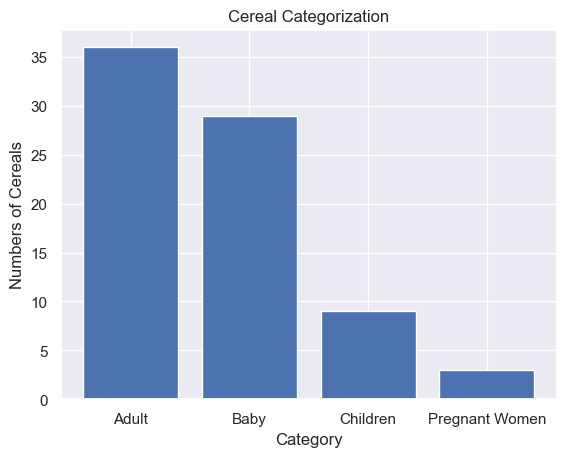

In [544]:
# counting the number of cereals in each category
category_counts=cereal['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Numbers of Cereals')
plt.title('Cereal Categorization')
plt.show()


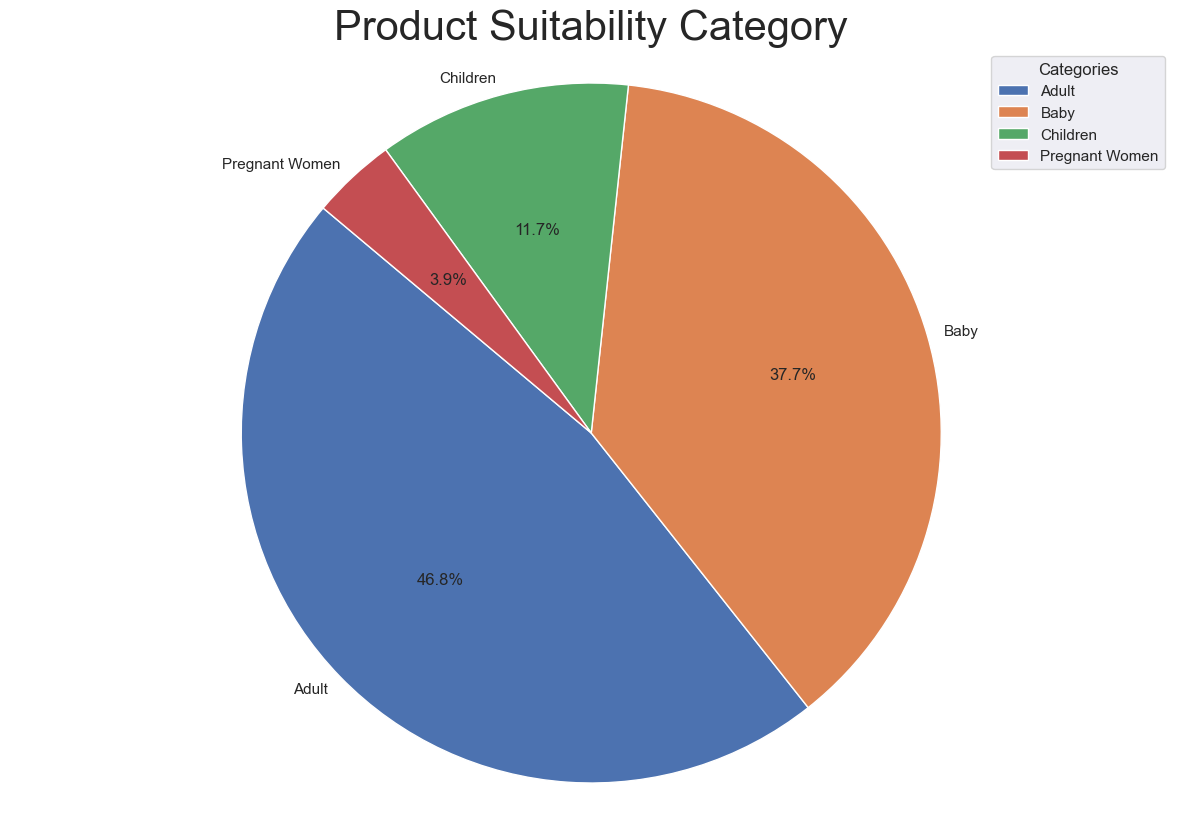

In [545]:
#Creating a Pie Chart for the Categories
counts = cereal["category"].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(counts, labels=counts.index, labeldistance=1.05, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Product Suitability Category', fontsize=30)


# Display the pie chart
plt.axis('equal')
plt.legend(counts.index, title='Categories', loc='upper right')
plt.show()

From the Above Visualization it is oberved that
1. Adults and Babies have the highest number of products suitable for thier consumption with 46.8% and 37.7% repectively
2. Pregnant women had the number of products suitable for thier consumption with 3.9%

In [546]:
#Printing Out the list of Products for each category
baby_cereals=cereal[cereal['category']=='Baby']
print('Cereals Suitable For Babies:')
print(baby_cereals[['name','category']])

children_cereals=cereal[cereal['category']=='Children']
print('Cereals Suitable For Children:')
print(children_cereals[['name','category']])

adult_cereals=cereal[cereal['category']=='Adult']
print('Cereals Suitable For Adults:')
print(adult_cereals[['name','category']])

pregnant_women_cereals=cereal[cereal['category']=='Pregnant Women']
print('Cereals Suitable For Pregnant Women:')
print(pregnant_women_cereals[['name','category']])

Cereals Suitable For Babies:
                         name category
0                   100% Bran     Baby
2                    All-Bran     Baby
3   All-Bran with Extra Fiber     Baby
8                   Bran Chex     Baby
9                 Bran Flakes     Baby
16                Corn Flakes     Baby
20     Cream of Wheat (Quick)     Baby
22     Crispy Wheat & Raisins     Baby
23                Double Chex     Baby
26        Frosted Mini-Wheats     Baby
30               Golden Crisp     Baby
32          Grape Nuts Flakes     Baby
41                       Life     Baby
43                      Maypo     Baby
47       Multi-Grain Cheerios     Baby
50          Nutri-grain Wheat     Baby
53                 Product 19     Baby
54                Puffed Rice     Baby
55               Puffed Wheat     Baby
56         Quaker Oat Squares     Baby
59            Raisin Nut Bran     Baby
60             Raisin Squares     Baby
63             Shredded Wheat     Baby
64     Shredded Wheat 'n'Bran     B

In [547]:
pregnant_women_cereals.shape

(3, 19)

In [548]:
adult_cereals.shape

(36, 19)

In [549]:
category_counts

category
Adult             36
Baby              29
Children           9
Pregnant Women     3
Name: count, dtype: int64

# **Sugar and Fiber Product Content Classification**

In [550]:
#Classifying Cereals Based On Their Sugar and Fiber Content
high_sugar_threshold=9
low_fiber_threshold=3

cereal["Group"]= ""
cereal.loc[cereal['sugars']>high_sugar_threshold,'Group']='High Sugar(Diabetes Risk)'
cereal.loc[cereal['fiber']<low_fiber_threshold,'Group']='Low Fiber(Health Risk)'
cereal.loc[(cereal['sugars']<=high_sugar_threshold)&(cereal['fiber']>=low_fiber_threshold),'Group']='Moderate'

In [551]:
group_counts=cereal['Group'].value_counts()
print(group_counts)

Group
Low Fiber(Health Risk)       50
Moderate                     19
High Sugar(Diabetes Risk)     8
Name: count, dtype: int64


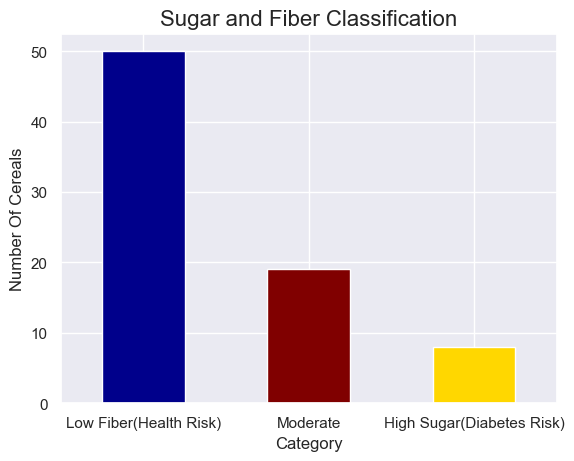

In [552]:
colors =["darkblue", "maroon", "gold"]
group_counts.plot(kind="bar", color=colors)
plt.xlabel("Category", )
plt.ylabel("Number Of Cereals")
plt.xticks(rotation=0)
plt.title("Sugar and Fiber Classification", fontsize=16)
plt.show()

In [553]:
#Showing the products based on the Group
moderate_cereals=cereal[cereal['Group']=='Moderate']
print(moderate_cereals[['name','Group']])

High_Risk_Diabetic_cereals=cereal[cereal['Group']=='High Sugar(Diabetes Risk)']
print(High_Risk_Diabetic_cereals[['name','Group']])

Low_Fibre_cereals=cereal[cereal['Group']=='Low Fiber(Health Risk)']
print(Low_Fibre_cereals[['name','Group']])


                         name     Group
0                   100% Bran  Moderate
2                    All-Bran  Moderate
3   All-Bran with Extra Fiber  Moderate
8                   Bran Chex  Moderate
9                 Bran Flakes  Moderate
19         Cracklin' Oat Bran  Moderate
26        Frosted Mini-Wheats  Moderate
32          Grape Nuts Flakes  Moderate
33                 Grape-Nuts  Moderate
34         Great Grains Pecan  Moderate
49  Nutri-Grain Almond-Raisin  Moderate
50          Nutri-grain Wheat  Moderate
63             Shredded Wheat  Moderate
64     Shredded Wheat 'n'Bran  Moderate
65  Shredded Wheat spoon size  Moderate
68    Strawberry Fruit Wheats  Moderate
71          Total Whole Grain  Moderate
74                 Wheat Chex  Moderate
75                   Wheaties  Moderate
                                      name                      Group
27  Fruit & Fibre Dates; Walnuts; and Oats  High Sugar(Diabetes Risk)
28                           Fruitful Bran  High Sugar(Diabe

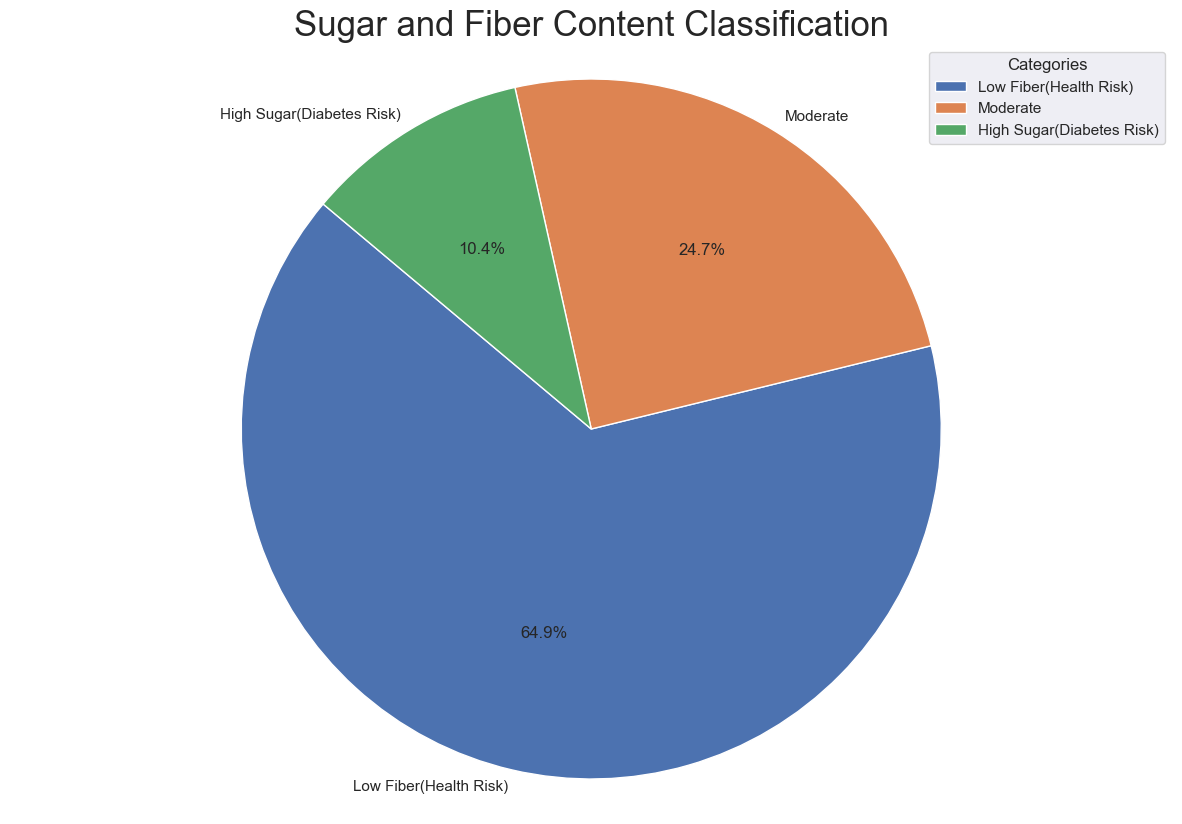

In [554]:
counts_sugarfiber = cereal["Group"].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(counts_sugarfiber, labels=counts_sugarfiber.index, labeldistance=1.05, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Sugar and Fiber Content Classification', fontsize=25)


# Display the pie chart
plt.axis('equal')
plt.legend(counts_sugarfiber.index, title='Categories', loc='upper right')
plt.show()

From the Above Visualization it is oberved that
1. Low Fiber(Health Risk) has the highest number of products in the data set with 64.9% which shows half of the products has low fiber content
2. High sugar(Diabetes Risk) has the lowest number of products in the data set with 10.4%

# **Categorizing The Cereals As Cold Or Hot Cereal Types**

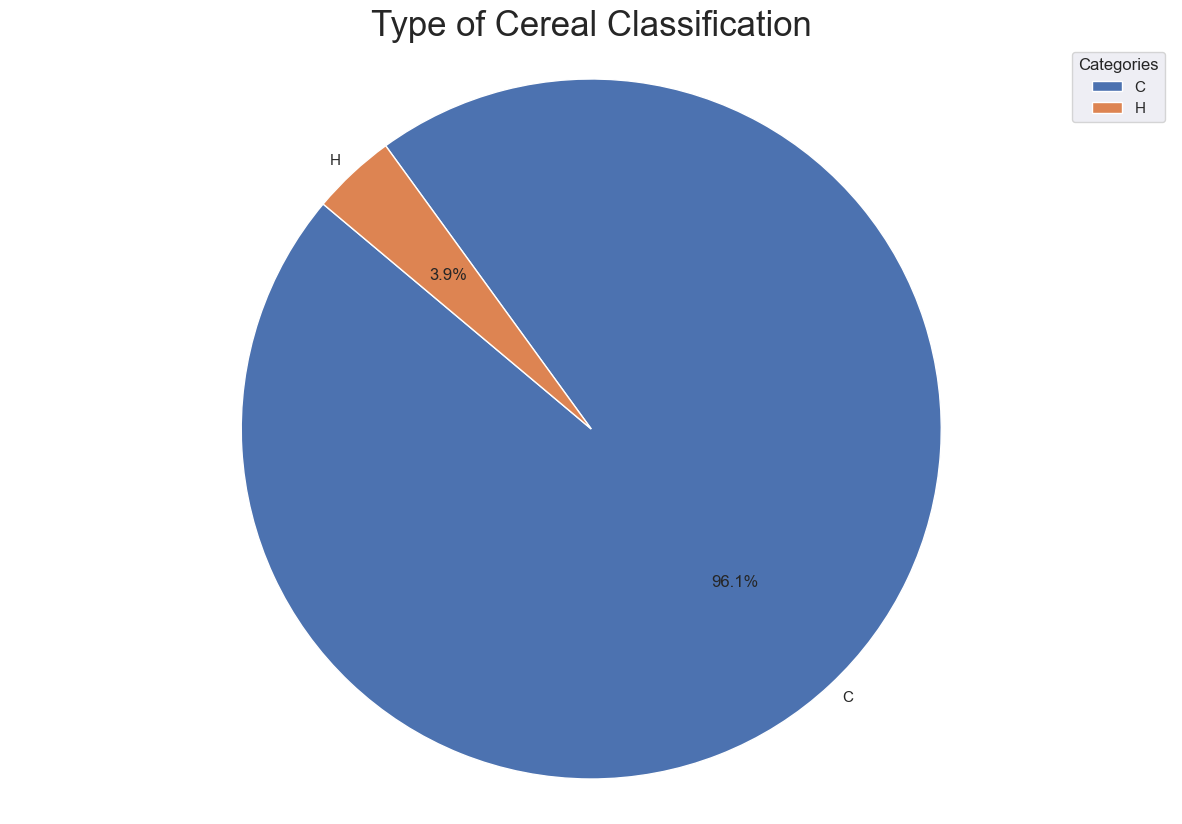

In [555]:
counts_type = cereal["type"].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(counts_type, labels=counts_type.index, labeldistance=1.05, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Type of Cereal Classification', fontsize=25)


# Display the pie chart
plt.axis('equal')
plt.legend(counts_type.index, title='Categories', loc='upper right')
plt.show()

From the Above Visualization it is oberved that
1. H(Hot) served cereals has the lowest number of products in the data set with 3.9%
2. C(Cold) served cereals has the highest number of products in the data set with 96.1%

In [556]:
#Defining H(Hot)
selected_type="H"
#Defining C(Cold)
selected_type1="C"
#Filtering the Dataframe to get products under the selected type
p=cereal[cereal['type'] == selected_type]
p1=cereal[cereal['type'] == selected_type1]
#printing Out the Name of Cereals based on type
print(p['name'])
print(p1['name'])

20    Cream of Wheat (Quick)
43                     Maypo
57            Quaker Oatmeal
Name: name, dtype: object
0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 74, dtype: object


### Categorizing Cereals Based On Customer Ratings

In [557]:
#categorizing cerals based on their ratings
bins = [0, 20, 40, 60, 80, 100]
labels =  ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
cereal['rating_category'] = pd.cut(cereal['rating'], labels=labels, bins=bins)

       rating rating_category
0   68.402973            Good
1   33.983679            Poor
2   59.425505         Average
3   93.704912       Excellent
4   34.384843            Poor
..        ...             ...
72  39.106174            Poor
73  27.753301            Poor
74  49.787445         Average
75  51.592193         Average
76  36.187559            Poor

[77 rows x 2 columns]


In [558]:
excellent_cereals=cereal[cereal['rating_category']=='Excellent']
good_cereals=cereal[cereal['rating_category']=='Good']
average_cereals=cereal[cereal['rating_category']=='Average']
poor_cereals=cereal[cereal['rating_category']=='Poor']
very_poor_cereals=cereal[cereal['rating_category']=='Very Poor']

In [559]:
#Printing the Products based on Rating Category
print('Excellent Cereals:', excellent_cereals[['name','rating']])

print('\n Good Cereals:', good_cereals[['name','rating']])

print('\n Average Cereals:', average_cereals[['name','rating']])

print('\n Poor Cereals:', poor_cereals[['name','rating']])

print('\n Very Poor Cereals:', very_poor_cereals[['name','rating']])

Excellent Cereals:                         name     rating
3  All-Bran with Extra Fiber  93.704912

 Good Cereals:                          name     rating
0                   100% Bran  68.402973
20     Cream of Wheat (Quick)  64.533816
54                Puffed Rice  60.756112
55               Puffed Wheat  63.005645
63             Shredded Wheat  68.235885
64     Shredded Wheat 'n'Bran  74.472949
65  Shredded Wheat spoon size  72.801787

 Average Cereals:                                       name     rating
2                                 All-Bran  59.425505
8                                Bran Chex  49.120253
9                              Bran Flakes  53.313813
11                                Cheerios  50.764999
13                                Clusters  40.400208
15                               Corn Chex  41.445019
16                             Corn Flakes  45.863324
19                      Cracklin' Oat Bran  40.448772
21                                 Crispix  46.89564

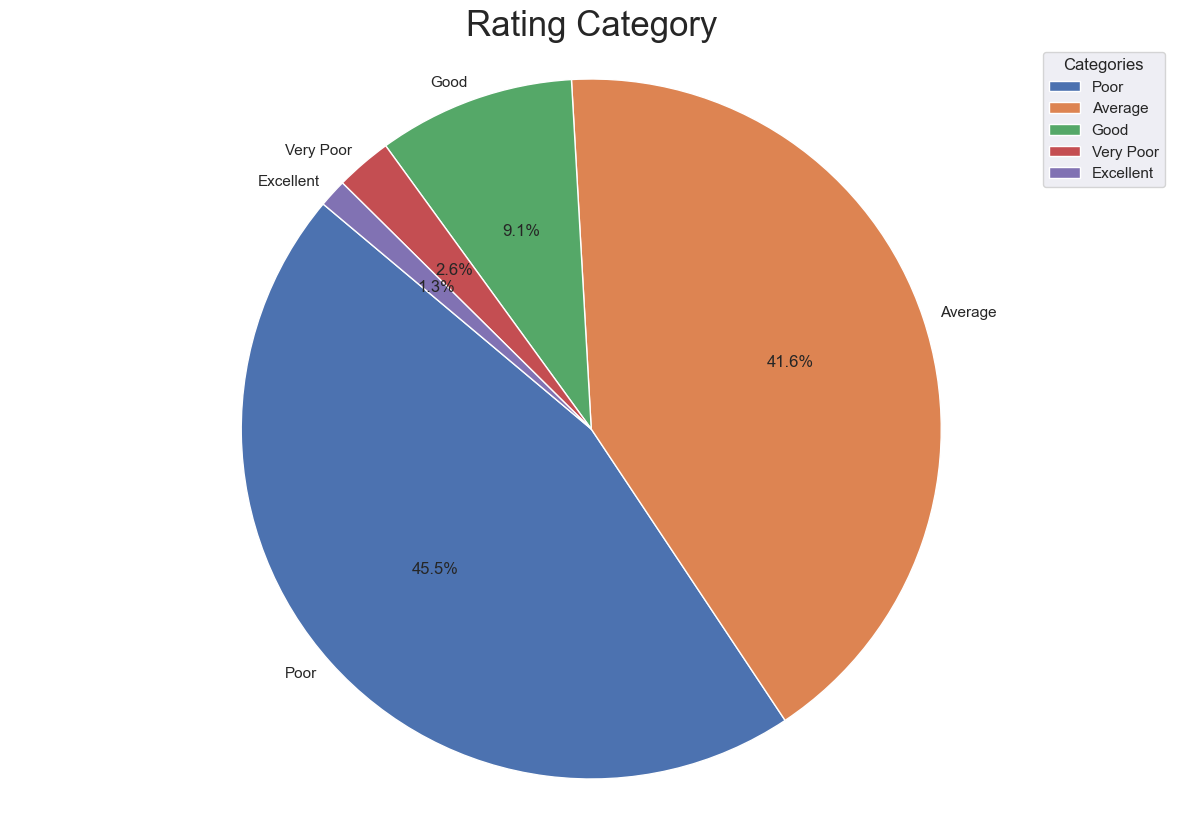

In [560]:
#Ploting a pie chart of Rating Category
counts_ratingc = cereal["rating_category"].value_counts()

# Plot the counts as a pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(counts_ratingc, labels=counts_ratingc.index, labeldistance=1.05, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Rating Category', fontsize=25)

# Display the pie chart
plt.axis('equal')
plt.legend(counts_ratingc.index, title='Categories', loc='upper right')
plt.show()